In [2]:
!pip install datasets transformers

In [3]:
from datasets import load_dataset
data_files = {
        "train": "en.noclean/c4-train.0000[0-1]-of-07168.json.gz",
    }
dataset = load_dataset("allenai/c4", data_files=data_files, split="train")

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.10/site-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


In [12]:
dataset

Dataset({
    features: ['text', 'timestamp', 'url'],
    num_rows: 296821
})

In [22]:
import re
# Function to extract the top-level domain (like .com, .info, etc.) from a URL
def extract_only_tld(url):
    # Extracting the domain and TLD part of the URL
    domain_and_tld_match = re.search(r'//(.*?)/', url)
    if not domain_and_tld_match:
        return None
   

    domain_and_tld = domain_and_tld_match.group(1)

    parts = domain_and_tld.split('.')
    strict_tld = parts[-1] if parts else None
    print(strict_tld)
    return strict_tld

# Extract top-level domains from the provided URLs
top_level_domains = [extract_only_tld(data['url']) for data in dataset]
# top_level_domains



com
com
info
com
com
com
com
com
com
com
com
com
com
org
com
com
com
com
com
au
com
gov
info
com
edu
gov
ie
com
com
com
com
uk
net
com
net
com
com
net
com
com
edu
de
com
com
com
com
me
com
uk
com
com
org
edu
com
my
com
com
uk
com
com
org
com
com
eu
info
com
com
com
hu
com
com
com
com
com
org
gov
com
com
edu
com
au
com
net
com
com
com
pl
org
br
com
com
com
in
com
com
uk
com
com
uk
org
com
com
com
org
in
uk
com
com
com
com
org
com
com
com
uk
com
com
uk
com
sg
com
com
com
com
org
com
com
se
co
com
net
com
com
com
net
uk
com
com
org
info
se
com
de
com
com
com
com
com
com
com
com
com
com
edu
com
com
au
com
com
com
com
org
info
com
com
com
ru
com
com
com
com
com
us
com
org
de
pt
com
com
com
au
com
com
ca
edu
de
org
net
me
uk
com
org
org
com
com
org
com
com
uk
com
org
com
com
com
com
me
com
com
cn
com
com
sg
com
com
com
com
com
com
com
com
com
com
be
uk
com
com
es
com
uk
org
xxx
com
uk
net
com
net
com
com
com
com
com
fi
com
com
com
com
com
com
com
com
org
com
com
au
com
uk
com
nl
com
com
xxx


In [20]:
top_level_domains

info


In [24]:
from collections import Counter


tld_counts = Counter(top_level_domains)

# Converting to a dictionary
tld_count_dict = dict(tld_counts)
tld_count_dict

{'com': 186012,
 'info': 4653,
 'org': 25769,
 'au': 6466,
 'gov': 1583,
 'edu': 4891,
 'ie': 862,
 'uk': 16499,
 'net': 11195,
 'de': 1690,
 'me': 1310,
 'my': 362,
 'eu': 1506,
 'hu': 153,
 'pl': 432,
 'br': 297,
 'in': 2112,
 'sg': 397,
 'se': 525,
 'co': 1569,
 'ru': 1040,
 'us': 1808,
 'pt': 107,
 'ca': 4256,
 'cn': 392,
 'be': 417,
 'es': 458,
 'xxx': 76,
 'fi': 207,
 'nl': 894,
 'za': 1275,
 'nz': 1454,
 'tv': 523,
 'ch': 459,
 'website': 49,
 'sh': 21,
 'jp': 591,
 'lb': 15,
 'tr': 113,
 'ph': 192,
 'it': 975,
 'fr': 627,
 'ga': 113,
 'no': 219,
 'io': 709,
 'realtor': 7,
 'blog': 362,
 'fm': 182,
 'events': 10,
 'tk': 452,
 'ng': 196,
 'pro': 151,
 'kr': 239,
 'om': 6,
 'je': 5,
 'ug': 28,
 'gr': 282,
 'biz': 480,
 'lk': 92,
 'name': 51,
 'mk': 17,
 'host': 14,
 'xyz': 207,
 'cz': 304,
 'digital': 13,
 'services': 8,
 'law': 8,
 'rs': 73,
 'int': 112,
 'global': 36,
 'hk': 256,
 'top': 64,
 'to': 81,
 'asia': 73,
 'is': 78,
 'ro': 192,
 'church': 34,
 'cc': 204,
 'dk': 269,
 '

In [25]:
sorted_tld_count_dict = dict(sorted(tld_count_dict.items(), key=lambda item: item[1], reverse=True))
sorted_tld_count_dict

{'com': 186012,
 'org': 25769,
 'uk': 16499,
 'net': 11195,
 'au': 6466,
 'edu': 4891,
 'info': 4653,
 'ca': 4256,
 'in': 2112,
 'us': 1808,
 'de': 1690,
 'gov': 1583,
 'co': 1569,
 'eu': 1506,
 'nz': 1454,
 'me': 1310,
 'za': 1275,
 'ru': 1040,
 'it': 975,
 'nl': 894,
 'ie': 862,
 'io': 709,
 'fr': 627,
 'jp': 591,
 'se': 525,
 'tv': 523,
 'biz': 480,
 'ch': 459,
 'es': 458,
 'tk': 452,
 'pl': 432,
 'be': 417,
 'sg': 397,
 'cn': 392,
 'my': 362,
 'blog': 362,
 'cz': 304,
 'tw': 302,
 'br': 297,
 'gr': 282,
 'dk': 269,
 'club': 269,
 'at': 259,
 'hk': 256,
 'pk': 241,
 'kr': 239,
 'id': 224,
 'no': 219,
 'fi': 207,
 'xyz': 207,
 'cc': 204,
 'ng': 196,
 'ph': 192,
 'ro': 192,
 'fm': 182,
 'ua': 180,
 'hu': 153,
 'pro': 151,
 'ae': 131,
 'online': 128,
 'tr': 113,
 'ga': 113,
 'int': 112,
 'pt': 107,
 'mobi': 105,
 'pw': 104,
 'nu': 98,
 'jobs': 95,
 'lt': 93,
 'lk': 92,
 'vn': 92,
 'site': 87,
 'il': 87,
 'sk': 86,
 'ee': 86,
 'ir': 82,
 'to': 81,
 'ke': 81,
 'mx': 80,
 'is': 78,
 'xxx'

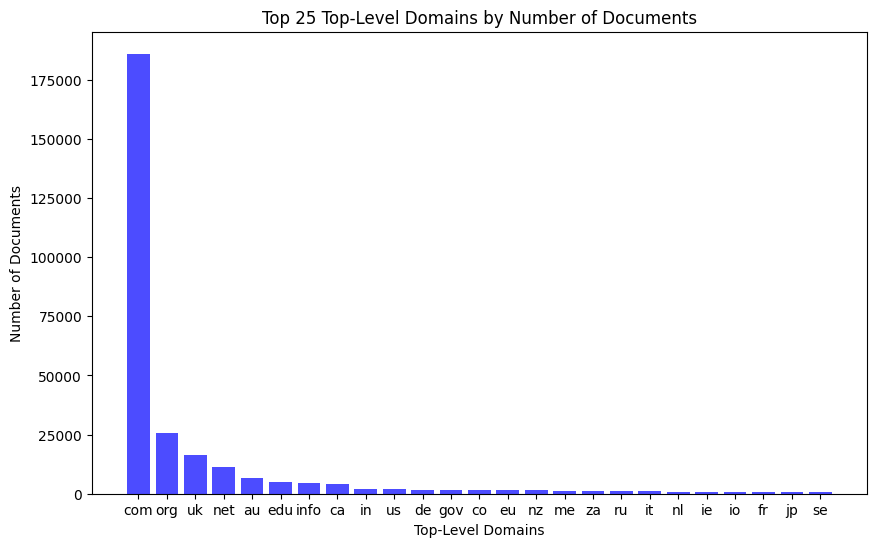

In [29]:
import matplotlib.pyplot as plt
# Plotting the histogram for top 25 TLDs
sorted_tld_count_dict_top_25 = dict(list(sorted_tld_count_dict.items())[:25])
plt.figure(figsize=(10, 6))
plt.bar(sorted_tld_count_dict_top_25.keys(), sorted_tld_count_dict_top_25.values(), color='blue', alpha=0.7)
plt.xlabel('Top-Level Domains')
plt.ylabel('Number of Documents')
plt.title('Top 25 Top-Level Domains by Number of Documents')
plt.show()

In [31]:
def extract_website_names(url):
    # Extracting the domain part of the URL, including 'www' if present
    domain_match = re.search(r'://(www\.)?([^/]+)', url)
    if not domain_match:
        return None

    www_part = domain_match.group(1) if domain_match.group(1) else ''
    domain = domain_match.group(2)
    return www_part + domain

websites = [extract_website_names(data['url']) for data in dataset]

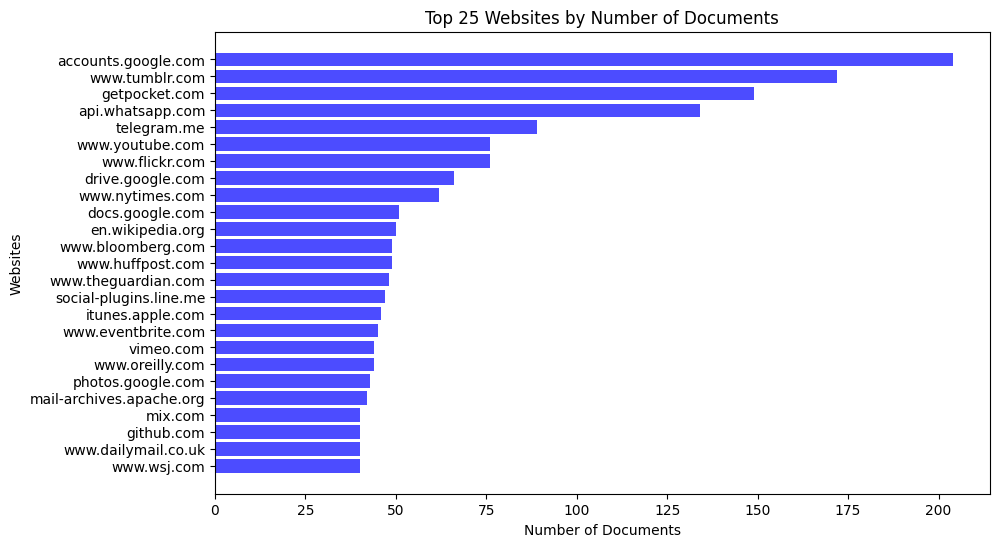

In [38]:
website_counts = Counter(websites)

# Converting to a dictionary
website_count_dict = dict(website_counts)
sorted_website_count_dict = dict(sorted(website_count_dict.items(), key=lambda item: item[1], reverse=True))

# Plotting the histogram for top 25 TLDs
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_website_count_dict_top_25.keys()), sorted_website_count_dict_top_25.values(), color='blue', alpha=0.7)
plt.xlabel('Number of Documents')
plt.ylabel('Websites')
plt.title('Top 25 Websites by Number of Documents')
plt.gca().invert_yaxis()  # Inverting the y-axis for a better view
plt.show()